<a href="https://colab.research.google.com/github/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/blob/main/03_CoverTypes2022_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NDVI temporal signature (time series) sampling for cover types in Bajo de los Saladillos (2022)

## Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from scipy.stats import norm

## Data processing

In [ ]:
# Import data from GH repo
!wget https://raw.githubusercontent.com/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/refs/heads/main/Primary_data/MODIS_TS_byCoverType.csv

--2025-06-08 19:16:51--  https://raw.githubusercontent.com/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/refs/heads/main/Primary_data/MODIS_TS_byCoverType.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319925 (312K) [text/plain]
Saving to: ‘MODIS_TS_byCoverType.csv.1’

MODIS_TS_byCoverTyp 100%[===================>] 312.43K  --.-KB/s    in 0.007s  

2025-06-08 19:16:51 (40.8 MB/s) - ‘MODIS_TS_byCoverType.csv.1’ saved [319925/319925]



In [ ]:
# Load the csv file
dfLoaded = pd.read_csv('/content/MODIS_TS_byCoverType.csv')
dfLoaded = dfLoaded.drop(columns=['system:index', '.geo'])

In [ ]:
dfLoaded.head(10)

,2000_02_18,2000_03_05,2000_03_21,2000_04_06,2000_04_22,2000_05_08,2000_05_24,2000_06_09,2000_06_25,2000_07_11,...,2022_08_13,2022_08_29,2022_09_14,2022_09_30,2022_10_16,2022_11_01,2022_11_17,2022_12_03,2022_12_19,Cobertura
0,0.45,0.51,0.52,0.66,0.73,0.67,0.66,0.67,0.61,0.60,...,0.51,0.54,0.51,0.41,0.38,0.38,0.36,0.36,0.34,ArrocerasN1
1,0.86,0.83,0.72,0.60,0.51,0.35,0.38,0.40,0.35,0.26,...,0.33,0.36,0.41,0.34,0.32,0.29,0.22,0.28,0.24,ArrocerasN2
2,0.54,0.48,0.54,0.68,0.69,0.68,0.64,0.66,0.60,0.60,...,0.48,0.50,0.51,0.27,0.26,0.27,0.27,0.32,0.65,ArrocerasN3
3,0.55,0.51,0.61,0.70,0.69,0.67,0.66,0.68,0.65,0.70,...,0.38,0.41,0.42,0.38,0.39,0.43,0.39,0.54,0.52,ArrocerasN4
4,0.72,0.72,0.74,0.70,0.78,0.76,0.72,0.75,0.75,0.69,...,0.54,0.62,0.65,0.61,0.61,0.53,0.43,0.52,0.51,ArrocerasM1
5,0.82,0.86,0.82,0.77,0.74,0.72,0.68,0.62,0.67,0.60,...,0.58,0.54,0.48,0.44,0.42,0.39,0.35,0.40,0.42,ArrocerasM2
6,0.73,0.77,0.73,0.78,0.77,0.75,0.70,0.72,0.66,0.66,...,0.54,0.57,0.62,0.53,0.51,0.52,0.50,0.54,0.47,ArrocerasM3
7,0.79,0.78,0.77,0.67,0.58,0.51,0.41,0.45,0.51,0.55,...,0.51,0.55,0.62,0.51,0.50,0.47,0.45,0.50,0.47,ArrocerasM4
8,0.80,0.83,0.79,0.81,0.85,0.82,0.81,0.82,0.77,0.68,...,0.27,0.30,0.27,0.27,0.28,0.31,0.29,0.55,0.82,ArrocerasM5
9,0.66,0.67,0.47,0.74,0.72,0.78,0.70,0.70,0.64,0.56,...,0.28,0.30,0.27,0.25,0.29,0.30,0.63,0.85,0.85,ArrocerasS1


In [ ]:
# Extract the NDVI values
matrixNDVISamples = dfLoaded.iloc[:, :-1].to_numpy()
matrixNDVISamples = matrixNDVISamples#*10000

In [ ]:
# Get dates and cover types values
listDates = list(dfLoaded.columns)
listSamples = list(dfLoaded['Cobertura'])

In [ ]:
# Data pivoting
dfNDVITransver = pd.DataFrame()

for i, s in enumerate(listSamples):
  dfNDVITransver[s] = matrixNDVISamples[i, :]

dfNDVITransver['Fecha'] = listDates[:-1]
dfNDVITransver['Fecha'] = pd.to_datetime(dfNDVITransver['Fecha'], format='%Y_%m_%d') #'%m/%d/%Y'

<ipython-input-177-b3830c60a133>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfNDVITransver[s] = matrixNDVISamples[i, :]
<ipython-input-177-b3830c60a133>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfNDVITransver[s] = matrixNDVISamples[i, :]
<ipython-input-177-b3830c60a133>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

In [ ]:
 dfNDVITransver.head(5)

,ArrocerasN1,ArrocerasN2,ArrocerasN3,ArrocerasN4,ArrocerasM1,ArrocerasM2,ArrocerasM3,ArrocerasM4,ArrocerasM5,ArrocerasS1,...,SabanasM2,SabanasM3,SabanasM4,SabanasM5,SabanasN1,SabanasN2,SabanasN3,SabanasN4,SabanasN5,Fecha
0,0.45,0.86,0.54,0.55,0.72,0.82,0.73,0.79,0.80,0.66,...,0.70,0.62,0.71,0.68,0.66,0.75,0.79,0.76,0.74,2000-02-18
1,0.51,0.83,0.48,0.51,0.72,0.86,0.77,0.78,0.83,0.67,...,0.76,0.72,0.76,0.74,0.73,0.78,0.81,0.67,0.65,2000-03-05
2,0.52,0.72,0.54,0.61,0.74,0.82,0.73,0.77,0.79,0.47,...,0.77,0.58,0.72,0.71,0.71,0.76,0.79,0.68,0.69,2000-03-21
3,0.66,0.60,0.68,0.70,0.70,0.77,0.78,0.67,0.81,0.74,...,0.77,0.77,0.67,0.77,0.71,0.77,0.80,0.72,0.71,2000-04-06
4,0.73,0.51,0.69,0.69,0.78,0.74,0.77,0.58,0.85,0.72,...,0.74,0.75,0.77,0.74,0.76,0.78,0.82,0.72,0.76,2000-04-22


# EDA


In [ ]:
# Get cover type's names
listSamplesClean = []

for s in listSamples:
  if s[-3] == 'S' or s[-3] == 'M' or s[-3] == 'N': # S: Sur (South), M: Medio (Middle), N: Norte (North)
    listSamplesClean.append(s[:-3])
  else:
    listSamplesClean.append(s[:-2])

listSamplesClean = list(set(listSamplesClean))

print(listSamplesClean)

['Estero o bañados', 'Sabanas', 'Forestal', 'Pastizales', 'Arroceras', 'Parcelas A-G', 'Bosque']


### Samples NDVI temporal singature by cover type

BosqueN
BosqueM
BosqueS


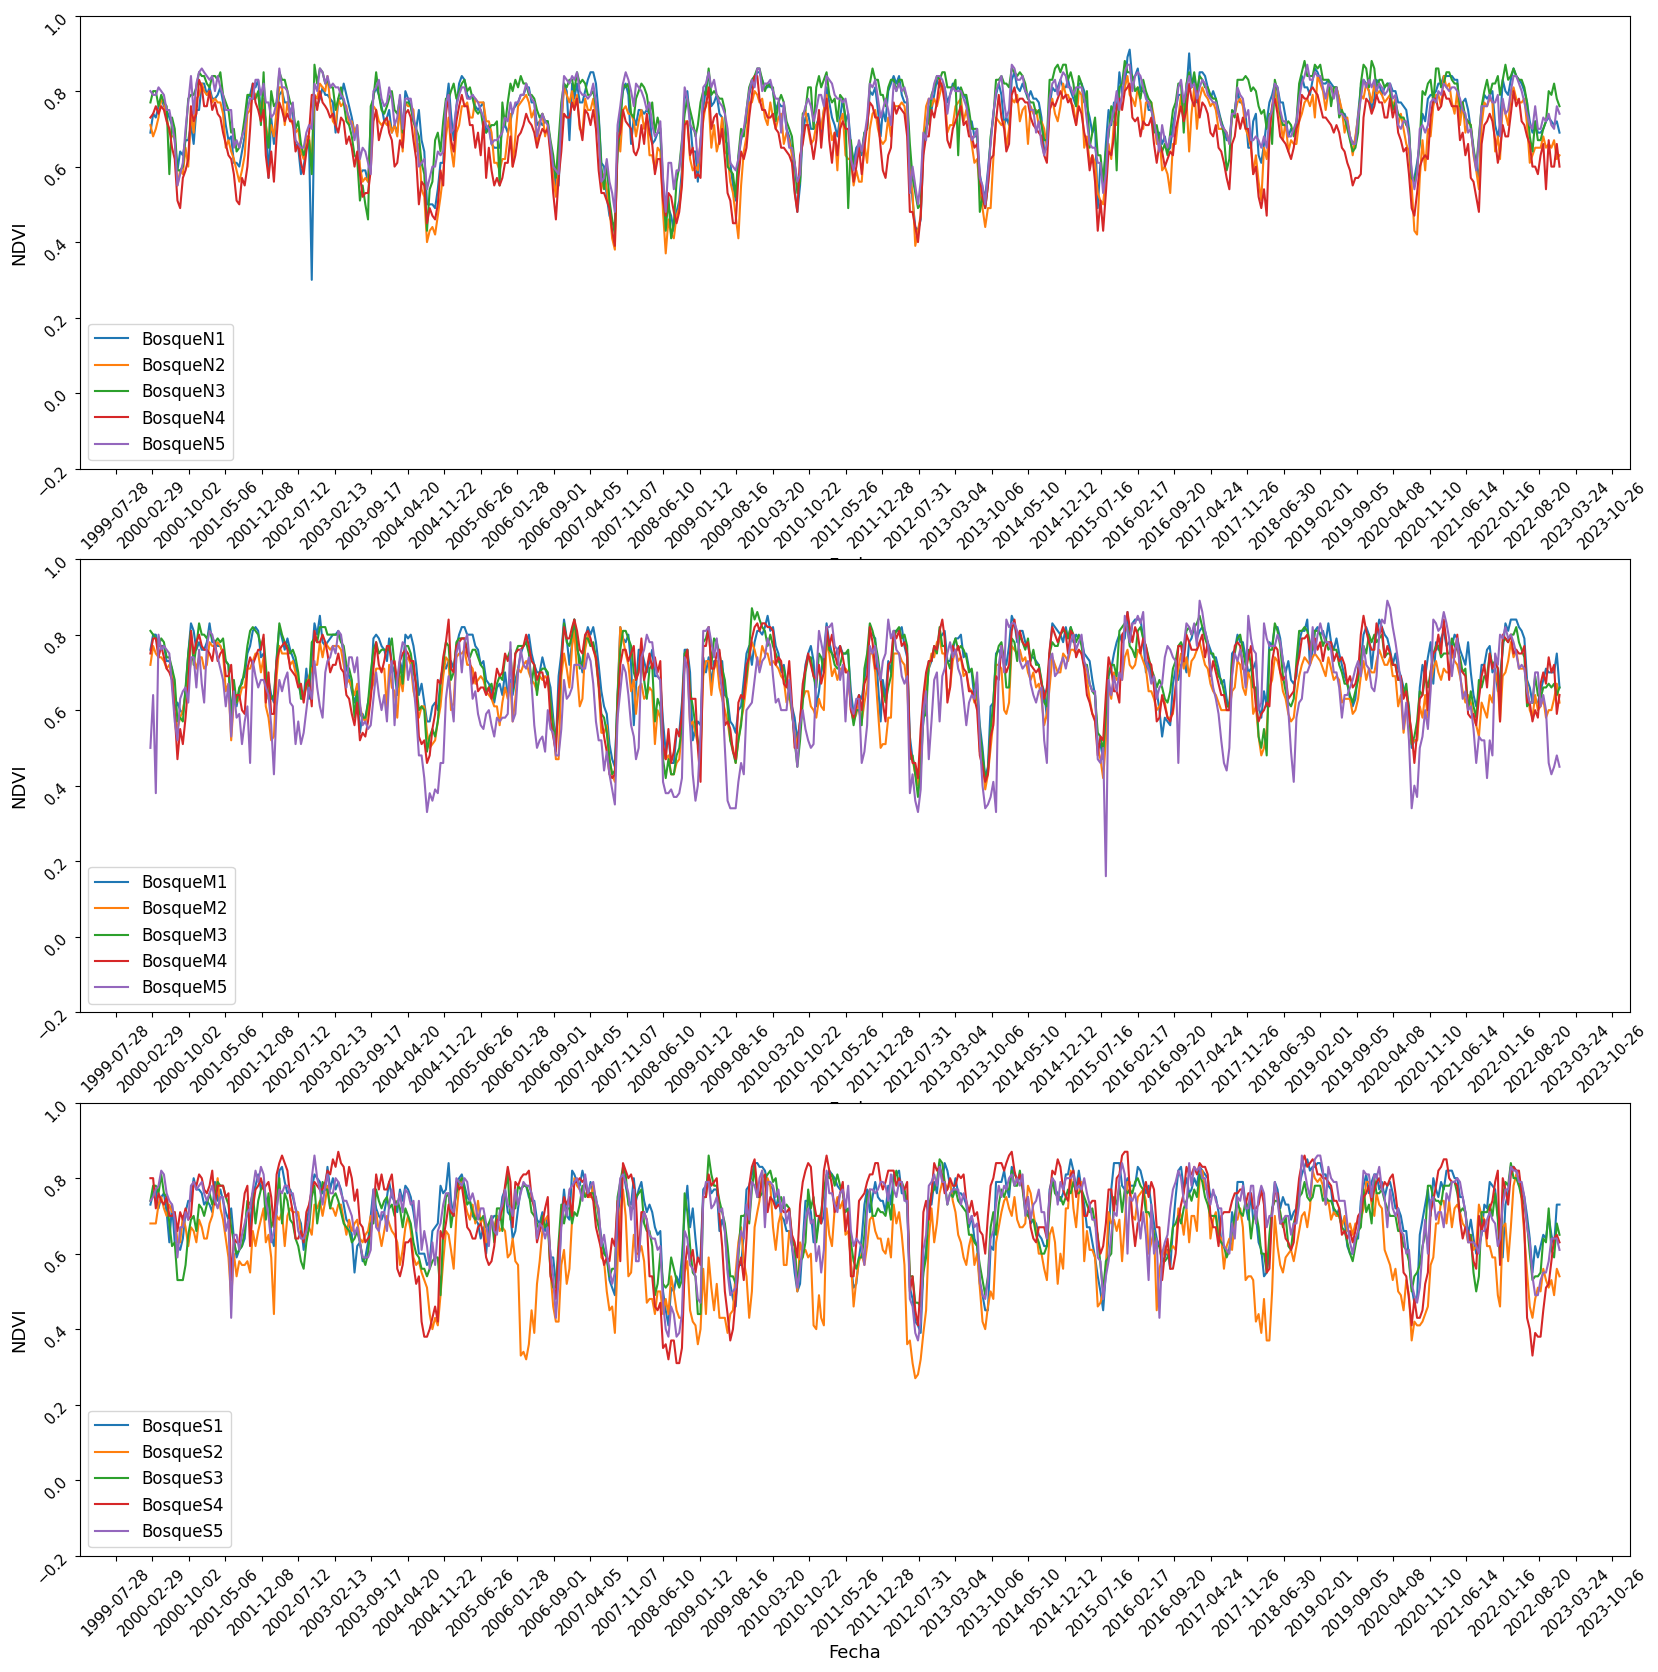

In [ ]:
s = 6 # Cover type position in listSamplesClean

fig, axs = plt.subplots(3, 1, figsize=(20, 20))

pos = 0
for z in ['N', 'M', 'S']:
  print(f'{listSamplesClean[s]}{z}')
  dfNDVITransverFilt = dfNDVITransver.filter(like=f'{listSamplesClean[s]}{z}')#.plot()
  for subS in list(dfNDVITransverFilt.columns):
    axs[pos].plot(dfNDVITransver['Fecha'], np.array(dfNDVITransverFilt[subS]),
        label=subS)

    axs[pos].set_ylabel('NDVI', fontsize=13)
    axs[pos].set_xlabel('Fecha', fontsize=13)
    axs[pos].legend(fontsize=12, loc='best')

    # Adjust the frequency of x-axis ticks
    axs[pos].xaxis.set_major_locator(plt.MultipleLocator(base=24*9))  # Adjust to desired frequency
    axs[pos].tick_params(axis='both', labelsize=11, rotation=45)

    axs[pos].set_ylim([-0.2000, 1])

  pos += 1

plt.show()

## Paddy fields samples analysis (Data timelapse: Oct-2010 to Feb-2016)

### Analysis of NDVI temporal signature for paddy fields

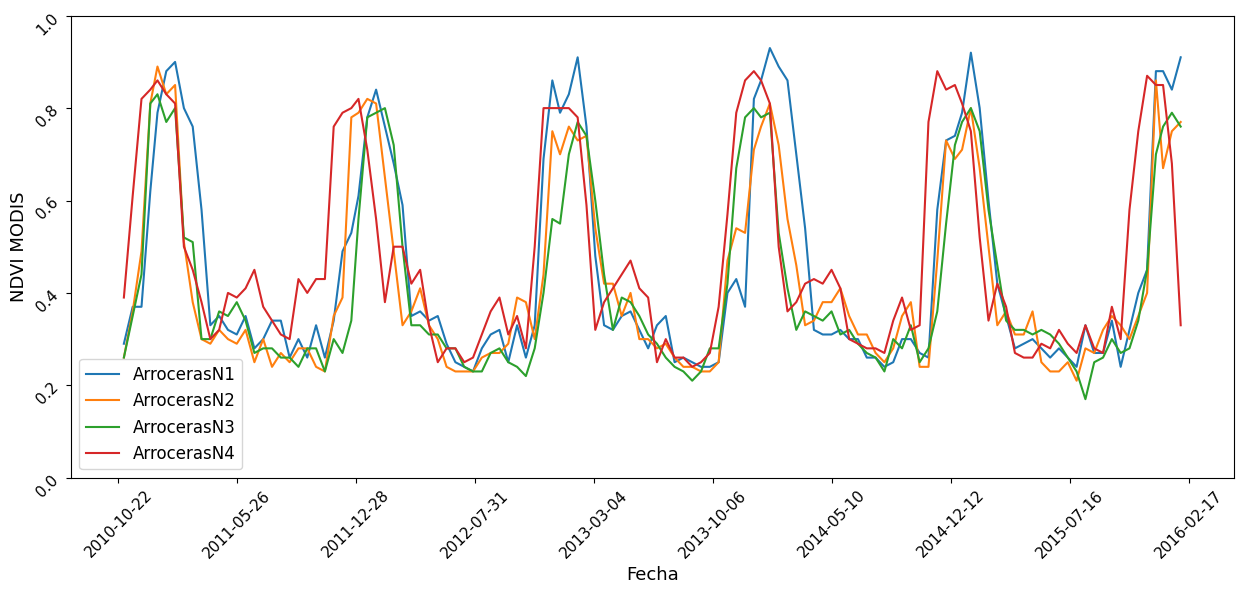

In [ ]:
# Select the samples and the timelapse for analysis
listArrocN = ['ArrocerasN1', 'ArrocerasN2', 'ArrocerasN3', 'ArrocerasN4']
startDateAN = '2010-10-22'
endDateAN = '2016-02-17'

# Make a copy and filter the dataset by dates
dfNDVITransverFilt01 = dfNDVITransver.copy()
dfNDVITransverFilt01 = dfNDVITransverFilt01[(dfNDVITransverFilt01['Fecha'] >= startDateAN) & (dfNDVITransverFilt01['Fecha'] <= endDateAN)]

# Plot the the NDVI timeseries for the selected period
fig, axs = plt.subplots(figsize=(15, 6))

for subS in list(listArrocN):
  axs.plot(dfNDVITransverFilt01['Fecha'],
    np.array(dfNDVITransverFilt01[subS]),
    label=subS)

  axs.set_ylabel('NDVI MODIS', fontsize=13)
  axs.set_xlabel('Fecha', fontsize=13)
  axs.legend(fontsize=12, loc='best')

  axs.xaxis.set_major_locator(plt.MultipleLocator(base=24*9))  # Adjust to desired frequency
  axs.tick_params(axis='both', labelsize=11, rotation=45)

  axs.set_ylim([0, 1])

plt.show()

### Analysis of monthly NDVI value (2010-2016)

In [ ]:
# Get a copy of the NDVI dataframe filtered by paddy fields
dfNDVITransverFilt01MV = dfNDVITransverFilt01[listArrocN].copy()

# Get month value of each register
listDates = dfNDVITransverFilt01['Fecha'].astype('str')
listMonths = [int(f[5:7]) for f in listDates]

# New dataframe with mean NDVI and month values
dfMeanNDVIxMM = pd.DataFrame()
dfMeanNDVIxMM['MeanNDVI'] = np.mean(dfNDVITransverFilt01MV.to_numpy(), axis=1) # Average the NDVI values for all (4) samples
dfMeanNDVIxMM['SD_NDVI'] = np.std(dfNDVITransverFilt01MV.to_numpy(), axis=1) # Standard deviation of the NDVI values for all (4) samples
dfMeanNDVIxMM['Mes'] = [int(f[5:7]) for f in listDates]

# Get monthly NDVI value for paddy fields according to 2010-2016 data
dfMeanNDVIxMM = dfMeanNDVIxMM.groupby('Mes').mean()

#### Barplot monthly values

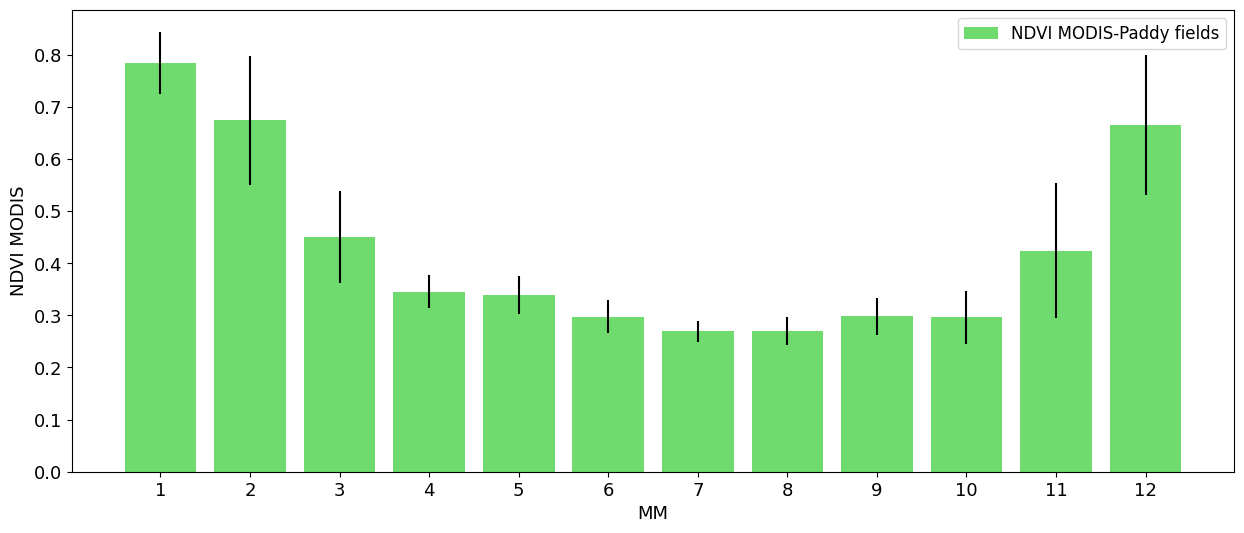

In [ ]:
fig, axs = plt.subplots(figsize=(15, 6))

axs.bar(dfMeanNDVIxMM.index, dfMeanNDVIxMM.MeanNDVI, yerr=dfMeanNDVIxMM.SD_NDVI,
        color='limegreen',
        alpha=0.7,
        width=0.8,
        label='NDVI MODIS-Paddy fields')

axs.set_ylabel('NDVI MODIS', fontsize=13)
axs.set_xlabel('MM', fontsize=13)

#axs.axhline(y=dfMeanNDVIxMM.MeanNDVI.mean(), label=f'Mean:{dfMeanNDVIxMM.MeanNDVI.mean()}',color='black', linestyle='--')
#axs.axhline(y=np.array(listMeanNDVIVal).max(), label=f'Max:{np.array(listMeanNDVIVal).max()}',color='red', linestyle='--')
#axs.axhline(y=np.array(listMeanNDVIVal).min(), label=f'Min:{np.array(listMeanNDVIVal).min()}',color='red', linestyle='--')

# Adjust the frequency of x-axis ticks
axs.xaxis.set_major_locator(plt.MultipleLocator(base=1))  # Adjust to desired frequency
axs.tick_params(axis='both', labelsize=13)

axs.legend(fontsize=12)

plt.show()

#### Summary

In [ ]:
print("Min. NDVI value: ", np.array(dfMeanNDVIxMM.MeanNDVI).min(), ". Month:", np.array(dfMeanNDVIxMM.MeanNDVI).argmin()+1)
print("Max. NDVI value: ", np.array(dfMeanNDVIxMM.MeanNDVI).max(), ". Month:", np.array(dfMeanNDVIxMM.MeanNDVI).argmax()+1)
#print("Mean NDVI value: ", np.array(dfMeanNDVIxMM.MeanNDVI).mean())

Min. NDVI value:  0.26925 . Month: 7
Max. NDVI value:  0.7843749999999999 . Month: 1


### Analysis of NDVI values distribution along the year (2010-2016)

In [ ]:
# Dataframe values to array
ndvi_toDist = dfNDVITransverFilt01MV.to_numpy().flatten()
print(ndvi_toDist.shape)

(488,)


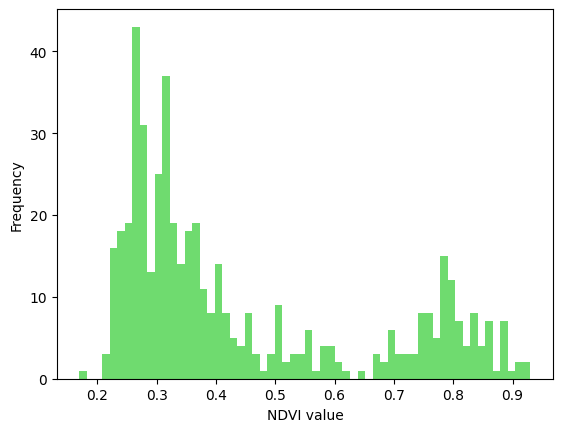

In [ ]:
# Plot a simple histogram of NDVI data
plt.hist(ndvi_toDist, bins=60, color='limegreen', alpha=0.7)
plt.xlabel('NDVI value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Get data distribution by bins
bins_data = np.histogram(ndvi_toDist, bins=60)

# Print data distribution by bins
print(bins_data)

# Find bin for data segregation
filt_bin = bins_data[1][np.where(bins_data[0] == 0)]
print(filt_bin)

(array([ 1,  0,  0,  3, 16, 18, 19, 43, 31, 13, 25, 37, 19, 14, 18, 19, 11,
        8, 14,  8,  5,  4,  8,  3,  1,  3,  9,  2,  3,  3,  6,  1,  4,  4,
        2,  1,  0,  1,  0,  3,  2,  6,  3,  3,  3,  8,  8,  5, 15, 12,  7,
        4,  8,  4,  7,  1,  7,  1,  2,  2]), array([0.17      , 0.18266667, 0.19533333, 0.208     , 0.22066667,
       0.23333333, 0.246     , 0.25866667, 0.27133333, 0.284     ,
       0.29666667, 0.30933333, 0.322     , 0.33466667, 0.34733333,
       0.36      , 0.37266667, 0.38533333, 0.398     , 0.41066667,
       0.42333333, 0.436     , 0.44866667, 0.46133333, 0.474     ,
       0.48666667, 0.49933333, 0.512     , 0.52466667, 0.53733333,
       0.55      , 0.56266667, 0.57533333, 0.588     , 0.60066667,
       0.61333333, 0.626     , 0.63866667, 0.65133333, 0.664     ,
       0.67666667, 0.68933333, 0.702     , 0.71466667, 0.72733333,
       0.74      , 0.75266667, 0.76533333, 0.778     , 0.79066667,
       0.80333333, 0.816     , 0.82866667, 0.84133333, 0.85

In [ ]:
# Get statistical parameters for data distribution
filt_value = filt_bin[-1] # Splitting value

ndvi_higher = ndvi_toDist[ndvi_toDist>filt_value]
ndvi_lower = ndvi_toDist[ndvi_toDist<filt_value]

mean_higher = np.mean(ndvi_higher)
mean_lower = np.mean(ndvi_lower)

std_higher = np.std(ndvi_higher)
std_lower = np.std(ndvi_lower)

#### Disagregated histogram analysis

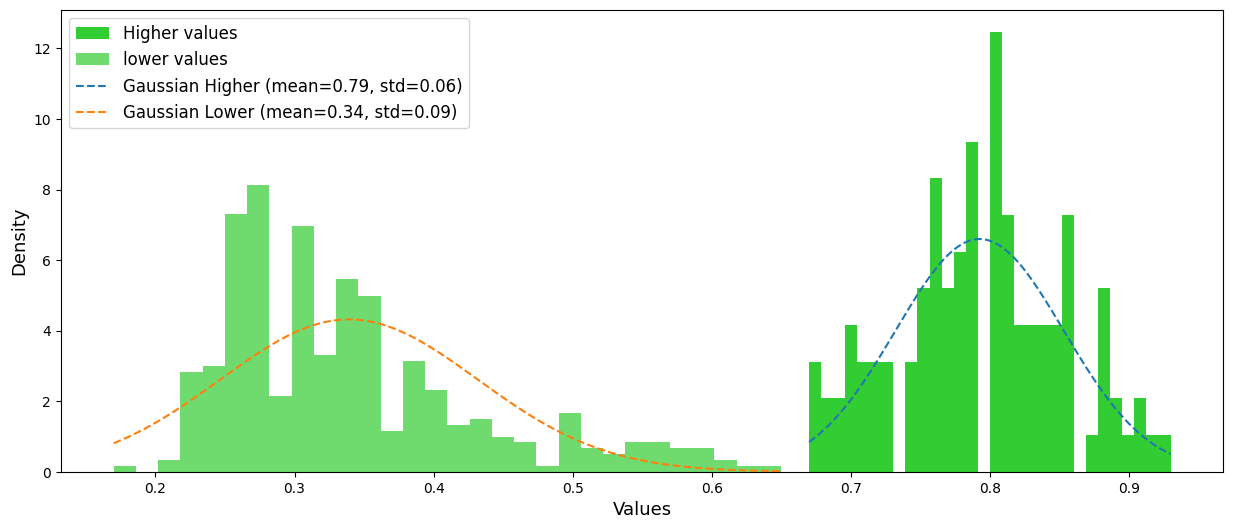

In [ ]:
fig, axs = plt.subplots(figsize=(15, 6))

# Histogram by bins normalized
axs.hist(ndvi_higher, bins=30, density=True, alpha=1, color='limegreen', label='Higher values')
axs.hist(ndvi_lower, bins=30, density=True, alpha=0.7, color='limegreen', label='lower values')

# Probability dense functions
x_higher = np.linspace(ndvi_higher.min(), ndvi_higher.max(), 1000)
x_lower = np.linspace(ndvi_lower.min(), ndvi_lower.max(), 1000)
axs.plot(x_higher, norm.pdf(x_higher, mean_higher, std_higher), '--', label=f'Gaussian Higher (mean={mean_higher:.2f}, std={std_higher:.2f})')
axs.plot(x_lower, norm.pdf(x_lower, mean_lower, std_lower), '--', label=f'Gaussian Lower (mean={mean_lower:.2f}, std={std_lower:.2f})')

axs.set_ylabel('Density', fontsize=13)
axs.set_xlabel('Values', fontsize=13)

axs.legend(fontsize=12, loc='best')


#### Sumarry

In [ ]:
print("Higher NDVI values statistiscals. Mean: ", mean_higher, "Standard deviation: ", std_higher)
print("Lower NDVI values statistiscals. Mean: ", mean_lower, "Standard deviation: ", std_lower)

Higher NDVI values statistiscals. Mean:  0.7927027027027029 Standard deviation:  0.06047776668301889
Lower NDVI values statistiscals. Mean:  0.3391777188328913 Standard deviation:  0.09239583127054805
